In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
datamatrix = DataMatrix()
datamatrix.load_multicharts('../deep_learning_trader/data/SPY_1_5_15_60_Minutes_01_01_10-10_31_16/SPY_15_Minute_01_01_2010-10_31_2016.txt')
datamatrix.clip_dt(DateTime(2014,1,1), DateTime(2016,1,1))

In [3]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2014-01-02 08:15:00,183.98,184.06,183.83,183.86,0
2014-01-02 08:30:00,184.15,184.18,183.93,183.98,0
2014-01-02 08:45:00,183.97,184.15,183.92,184.15,0
2014-01-02 09:00:00,183.90,184.02,183.88,183.97,0
2014-01-02 09:15:00,183.91,184.00,183.86,183.90,0


In [4]:
len(datamatrix)

16128

In [5]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [6]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2014-01-02 08:15:00,183.98,184.06,183.83,183.86,0
2014-01-02 08:30:00,184.15,184.18,183.93,183.98,0
2014-01-02 08:45:00,183.97,184.15,183.92,184.15,0
2014-01-02 09:00:00,183.90,184.02,183.88,183.97,0
2014-01-02 09:15:00,183.91,184.00,183.86,183.90,0


In [7]:
len(datamatrix)

16128

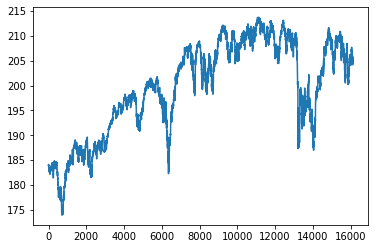

In [8]:
plot(datamatrix.close);

In [9]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [10]:
import datamodel_ta as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [11]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [12]:
dmodel.data.shape

(105, 15950)

In [13]:
dmodel.data[0:10, 0:5]

array([[ 0.30895808,  0.65721854,  0.34378412, -0.49204098,  0.23930598],
       [ 0.88625931,  0.15003158,  0.07253392, -0.12121022, -0.04371256],
       [ 0.42747758,  0.42747758,  0.0674645 , -0.11254203, -0.25654726],
       [ 0.6617554 ,  0.34620811, -0.49525134,  0.24102568, -0.42512972],
       [-0.82214825,  0.05285324,  0.27732873,  0.38636631, -0.27882561],
       [-0.31632491,  0.00777363,  0.22011406,  0.42127867,  0.56656422],
       [ 0.4281237 , -0.04127039, -0.02029886,  0.09716274,  0.88264958],
       [ 0.00410837,  0.03476041, -0.43529006, -0.44764836, -0.54271313],
       [ 0.10605943,  0.08218276, -0.42718632, -0.37147408, -0.47493967],
       [ 0.11142549,  0.05706889, -0.06062456,  0.01136318, -0.0129273 ]])

In [14]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 15950)

In [15]:
tgt[:, 0:5]

array([[183.3 , 183.49, 183.59, 183.45, 183.52],
       [183.55, 183.59, 183.61, 183.58, 183.57],
       [183.3 , 183.42, 183.44, 183.41, 183.34],
       [183.49, 183.59, 183.45, 183.52, 183.4 ]])

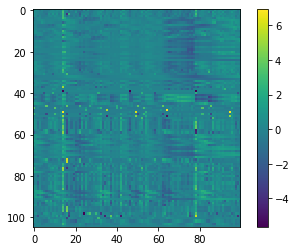

In [16]:
imshow(dmodel.data[:, 0:100]); colorbar();

In [17]:
np.save(open("data_spy.npy",'wb'), dmodel.data)
np.save(open("data_spy_targets.npy",'wb'), tgt)

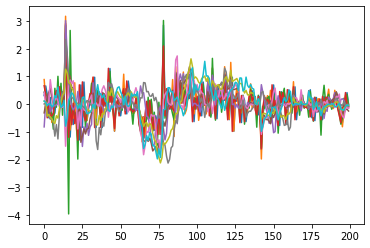

In [18]:
plot(dmodel.data.T[0:200, 0:10]);

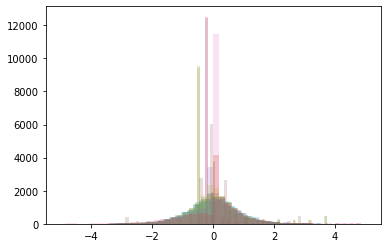

In [19]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [20]:
mean(a)

-0.002806765753721678